CSC233: Programming Paradigms
- SIT@KMUTT
- By PM
- March 2022

- Regular expression basics
- Note: Some notes and code are from Bill Lubanovic, Introducing Python, Oreilley, 2015

In [15]:
import re  # regular expression library/package

# match() checks whether the source begins with the pattern
result = re.match('Hello', 'The moon says Hello to the world')  # match Pattern to Source
print("1)")
print(result)

# Another use
pattern = "Hello"
source = 'Hellos, that\'s what the moon says to the world'  # \ used as escape character
result = re.match(pattern, source)
print("2)")
print(result)

# check the position
source[0:5] 

1)
None
2)
<re.Match object; span=(0, 5), match='Hello'>


'Hello'

In [ ]:
# Let's look at a simple snippet, small program dealing iwth RE

pattern = "(?:aa|b)*ab(?:bb)*"   # use (?:) for grouping instead of using ().
r = re.compile(pattern)
flag = True

while(flag):
    print("Here is the pattern we are looking for: ", "(aa|b)*ab(bb)*")
    txt = input("Enter a string for a pattern matching: ")
    x = r.findall(txt)
    print("Matched substring(s) is/are")
    print(x)
    while(True):
        answer = input("Continue? (y/n): ")
        if(answer == 'n' or answer == 'N'):
            flag = False
            break
        elif(answer == 'y' or answer == 'Y'):
            break


Here is the pattern we are looking for:  (aa|b)*ab(bb)*
Enter a string for a pattern matching: ab
Matched substring(s) is/are
['ab']
Continue? (y/n): y
Here is the pattern we are looking for:  (aa|b)*ab(bb)*
Enter a string for a pattern matching: aabbab
Matched substring(s) is/are
['aabbab']
Continue? (y/n): y
Here is the pattern we are looking for:  (aa|b)*ab(bb)*
Enter a string for a pattern matching: bab ab aaabbb babaa
Matched substring(s) is/are
['bab', 'ab', 'aaabbb', 'bab']
Continue? (y/n): y
Here is the pattern we are looking for:  (aa|b)*ab(bb)*
Enter a string for a pattern matching: adgff %323abbbfgaa lsls slsls
Matched substring(s) is/are
['abbb']
Continue? (y/n): n


Some useful functions:

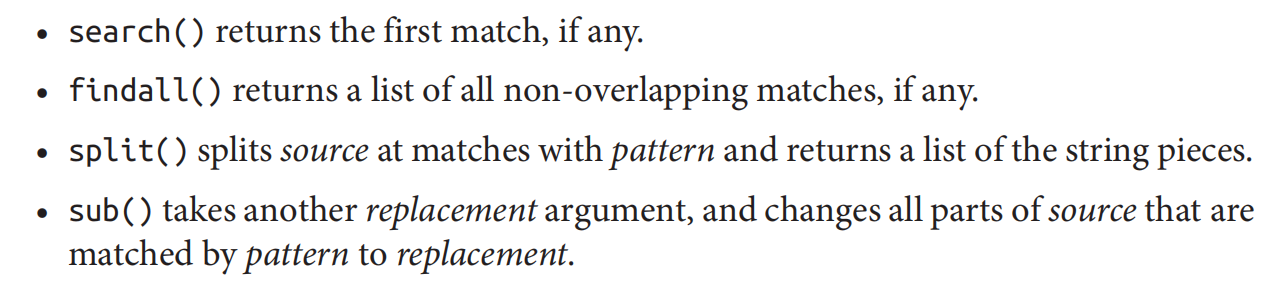

In [16]:
result = re.search('Hello', 'The moon syas Hello to the world')
print("3)")
print(result)
st = 'The moon syas Hello to the world'
print("Length = ", len(st))
print("Characters from 14 to 18 = ", st[14:19])

3)
<re.Match object; span=(14, 19), match='Hello'>
Length =  32
Characters from 14 to 18 =  Hello


Some symbols used in RE:

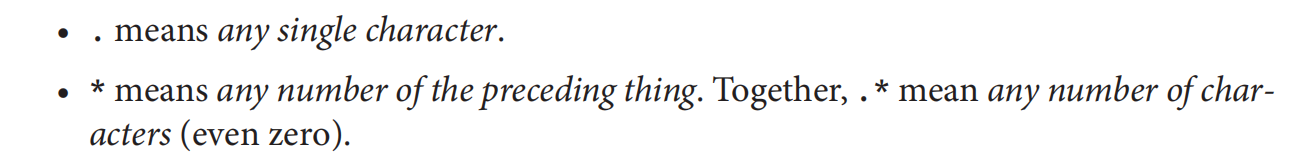

In [25]:
result = re.search('.*Hello', 'The moon syas Hello to the world')
print("4)")
print(result)


4)
<re.Match object; span=(0, 19), match='The moon syas Hello'>


In [30]:
if re.search('.*Hello', 'The moon syas Hello to the world'):
  print("Found!")
else:
  print("Not found.")

Found!


In [ ]:
result = re.findall('o', 'The moon syas Hello to the world')  # character o
print("5)")
print(result)
print("We found ", len(result), " matches.\n")

5)
['o', 'o', 'o', 'o', 'o']
We found  5  matches.


In [ ]:
result = re.findall('o.', 'The moon syas Hello to the world')  # o followed by any character.
print("6)")
print(result)
print("We found ", len(result), " matches.\n")

5)
['oo', 'o ', 'o ', 'or']
We found  4  matches.



In [ ]:
result = re.findall('(or)+', 'The moon syas Hello to the world')  # string 'or', occurring one or more times.
print("7)")
print(result)
print("We found ", len(result), " matches.\n")

7)
['or']
We found  1  matches.



Special characters

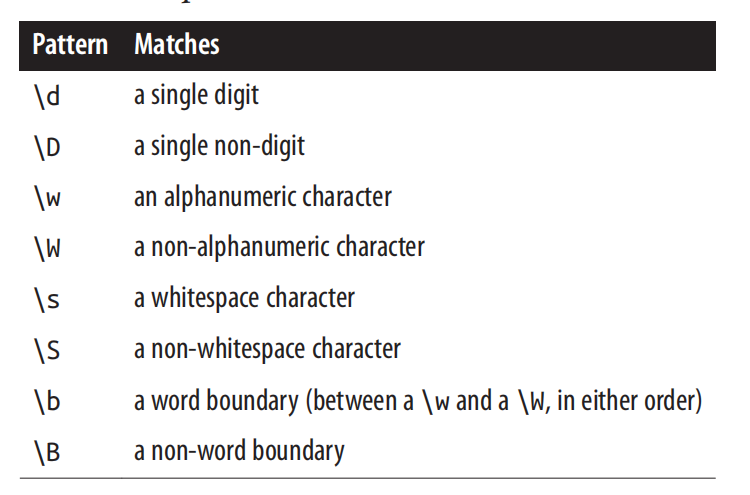

In [23]:
ip="192.168.254.1234"
if re.search(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",ip):
  print(ip)

192.168.254.1234


In [53]:
# Use a word boundary, \b pattern.

# '\bfoo' will match 'foobar' and 'foo bar' and 'bar foo', but not 'barfoo'.

pattern = r"\bfoo"  # use a raw string here, with the beginning r; if not, you need to have "\\bfoo" instead.
string = "foobar and foo bar and bar foo, but not barfoo"
result = re.findall(pattern, string) 
print()
print(result)

# 'foo\b' will match 'foo bar' and 'bar foo' and 'barfoo', but not 'foobar'.

pattern = r"foo\b"  # use a raw string here, with the beginning r
string = "foo bar and bar foo and barfoo, but not foobar"
result = re.findall(pattern, string) 
print()
print(result)


['foo', 'foo', 'foo']

['foo', 'foo', 'foo']


In [60]:
# Let's try to find an exact match for aircraft|airplane|jet

string = "Look over there, the waterjet is pouring out from the running jetski near the beach."
pattern =  "(?:aircraft|airplane|jet)"  # without using a word boundary; here 'jet' are from waterjet and jetski.
r = re.compile(pattern)
result = r.findall(string) 
print()
print(result)

string = "Look over there, the waterjet is pouring out from the running jetski near the beach."
pattern =   r"\b(?:aircraft|airplane|jet)\b" # use a word boundary; get exact words we want, if any.
r = re.compile(pattern)
result = r.findall(string) 
print()
print(result)

string = "the jet and jetski are noisy."
pattern =  r"\b(?:aircraft|airplane|jet)\b" # use a word boundary; get exact words we want, if any.
result = re.findall(pattern, string) 
print()
print(result)

# try to change the pattern, using with white space
string = "the jet and jetski are noisy."
pattern =  r"\sjet" # use one whitespace character at the front
result = re.findall(pattern, string) 
print()
print(result)



['jet', 'jet']

[]

['jet']

[' jet', ' jet']


In [ ]:

import string
prnt = string.printable
len(prnt)
print("The follows are 100 ASCII printable characters: \n")
prnt[:]


The follows are 100 ASCII printable characters: 



'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
res = re.findall('\d', prnt)
print(res)

res = re.findall('\w', prnt)

cnt = 0
for i in res:
  print(i, end=', ')
  cnt += 1
  if (cnt % 10) == 0:
    print()


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
a, b, c, d, e, f, g, h, i, j, 
k, l, m, n, o, p, q, r, s, t, 
u, v, w, x, y, z, A, B, C, D, 
E, F, G, H, I, J, K, L, M, N, 
O, P, Q, R, S, T, U, V, W, X, 
Y, Z, _, 

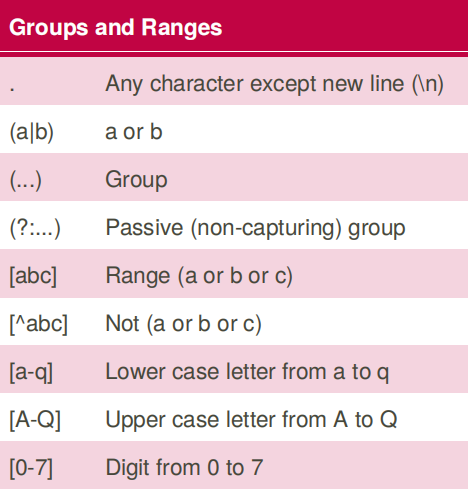

- Ref: Regular Expressions Cheat Sheet by Dave Child (DaveChild)

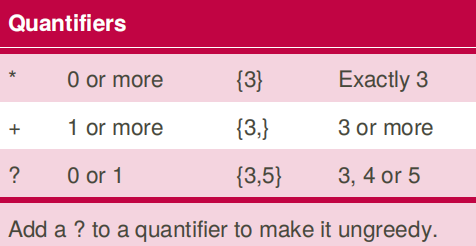

Some pattern specifiers:

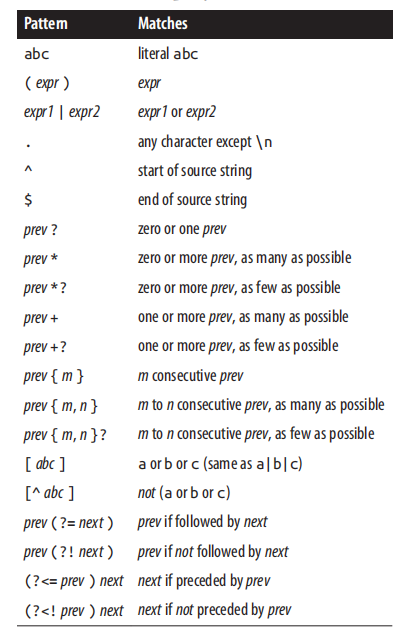

In [66]:
# The characters ^ and $ are called anchors:
#  ^ anchors the search to the beginning of the search string, 
#  and $ anchors it to the end.

source = "I never cry at night but evening."
res = re.findall('but evening\.$', source)  # end of string
print(res)

res = re.findall('^I nev', source)  # beginning of string
print(res)

res = re.findall('but(?= evening)', source)  # match 'but' if followed by 'evening'. Notice a whitespace before evening.
print(res)

res = re.findall('(?<=at )night', source) # match 'night' when preceded by 'at'. Notice a whitespace after 'at'.
print(res)

['but evening.']
['I nev']
['but']
['night']


In [ ]:
# Some more about RE uses

r = re.compile("r[ea]d") # character class in a square bracket
x = r.findall("read rad rattle red")
print(x)

r = re.compile("[0-9]") # any of the digit
x = r.findall("02-470-9892")
print(x)

r = re.compile("[^0-9]") # negation of the above; non-digit
x = r.findall("02-470-9892")
print(x)

r = re.compile("\d") # any of the digit; or use [\d]
x = r.findall("02-470-9892")
print(x)

In [ ]:


r = re.compile(".") # match anything except newlines
x = r.findall("BKK-470-9892")
print(x)

r = re.compile("[a-i]") # from a to i
x = r.findall("Let's start it over.")
print(x)

r = re.compile("\w")  # any alphanumeric character plus underscore; or use [\w]
x = r.findall("Let's start it over_.")
print(x)

r = re.compile("[a-zA-Z0-9_]") # same as [\w]
x = r.findall("Let's start it over_.")
print(x)

r = re.compile("e{1,3}") # quantifier; min = 1 to max = 3
x = r.findall("Eel... don't reel out and kneel ... eeeew")
print(x)

r = re.compile("e{2}") # quantifier; min = 2 to max = 2
x = r.findall("Eel... don't reel out and kneel ... eeeew")
print(x)

In [ ]:


r = re.compile("travel{1,2}ed") # quantifier;
x = r.findall("Travel ... travelled  .... traveled .. travellllledd")
print(x)

print()
print("{0,1}")
r = re.compile("travell?ed") # {0,1}
x = r.findall("Travel ... travelled  .... traveled .. travellllledd")
print(x)

print()
print("{0,n}")
r = re.compile("travell*ed") # {0,n}
x = r.findall("Travel ... travelled  .... traveled .. travellllledd")
print(x)

print()
print("{1,n}")
r = re.compile("travell+ed") # {1,n}
x = r.findall("Travel ... travelled  .... traveled .. travellllledd")
print(x)

print()
print("{1,n}")
r = re.compile("\d+") # {1,n}
x = r.findall("432.59e4")
print(x)


In [ ]:

# Parentheses have two uses:
# - grouping expressions
# - capturing the texts that match an expression

# E.g., , (air(?:craft|plane)|jet) will have only one capture if it matches (“aircraG” or “airplane” or “jet”)

r = re.compile("travel(?:ed)*") # Using (?: to switch off captures
x = r.findall("Travel ... travelled  .... traveled .. travellllledd")
print(x)

r = re.compile("trav(eled)") # Parentheses are used for captures
x = r.findall("Traveled ... traveleddd  ..trs.. traveled .. travellllledd")
print(x)

r = re.compile("(?:t|T)ravel") # | is used for selection; logical OR
x = r.findall("Travel ... travelled  .... traveled .. travellllledd")
print(x)


In [ ]:


print()
txt = "\w+ = .+"  # "." matches any character except a newline
r = re.compile(txt)  
myAreaCode = [ "BKK = 02", "Suphanburi = 035", "Chiang Mai = 053"]
for i in myAreaCode:
    x = r.findall(i)
    print(x)

print()
txt = "(\w+) = (.+)"  # Captures
r = re.compile(txt)  
myAreaCode = [ "BKK = 02", "Suphanburi = 035", "Chiang Mai = 053"]
for i in myAreaCode:
    x = r.findall(i)
    print(x)

print()
txt = "(?:\w+(?: )?\w+) = .+"  # Handle a space
r = re.compile(txt)  
myAreaCode = [ "BKK = 02", "Suphanburi = 035", "Chiang Mai = 053"]
for i in myAreaCode:
    x = r.findall(i)
    print(x)


In [ ]:


print()
txt = "aircraft|airplane|jet"
r = re.compile(txt)
# Split the string into a list, splitting it wherever there are matches
m = r.split("a jet ski or aircraft is not a jet airplane or jetliner")
print(m)

# Find all substrings where there are matches,
# and replace them with a different string
print()
m = r.sub("air", "a jet ski is not a jet plane or jetliner")
print(m)  


['rad', 'red']
['0', '2', '4', '7', '0', '9', '8', '9', '2']
['-', '-']
['0', '2', '4', '7', '0', '9', '8', '9', '2']
['B', 'K', 'K', '-', '4', '7', '0', '-', '9', '8', '9', '2']
['e', 'a', 'i', 'e']
['L', 'e', 't', 's', 's', 't', 'a', 'r', 't', 'i', 't', 'o', 'v', 'e', 'r', '_']
['L', 'e', 't', 's', 's', 't', 'a', 'r', 't', 'i', 't', 'o', 'v', 'e', 'r', '_']
['e', 'ee', 'ee', 'eee', 'e']
['ee', 'ee', 'ee', 'ee']
['travelled', 'traveled']

{0,1}
['travelled', 'traveled']

{0,n}
['travelled', 'traveled', 'travellllled']

{1,n}
['travelled', 'travellllled']

{1,n}
['432', '59', '4']
['travel', 'traveled', 'travel']
['eled', 'eled']
['Travel', 'travel', 'travel', 'travel']

['BKK = 02']
['Suphanburi = 035']
['Mai = 053']

[('BKK', '02')]
[('Suphanburi', '035')]
[('Mai', '053')]

['BKK = 02']
['Suphanburi = 035']
['Chiang Mai = 053']

['a ', ' ski or ', ' is not a ', ' ', ' or ', 'liner']

a air ski is not a air plane or airliner


To do:
CSC233 Assignment


1) Write a regular expression code in Python to handle the following six possible telephone number formats.

xxx.xxx.xxxx

xxx-xxx-xxxx

xxx-xxxxxxx

xxx xxx xxxx

(xxx) xxx-xxxx

(xxx) xxx xxxx

E.g.,

- 428.515.5355
- 086-315-5354
- 428-5165455 
- 350 535 5325
- (089) 815-5395
- (289) 888 5412

Any other format would result in an error.



2) Write a regular expression code in Python to handle real numbers like:
12, 8., .12, 0.4, 12.5, 12.5E4, 12.5e4, 12.4E+4, 22E4, 13e-4, etc. 

Check Python and use only those supported in the language. 

For instance, 3e+5 is ok, but 3e+5. is not.
